In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import scipy as sc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# data directory
DATA_DIR = os.path.join('..', 'data')

In [3]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C_hhold_test.csv')}}

In [4]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [22]:
num_a_train = a_train.select_dtypes(['number'])
corr = pd.DataFrame(columns=num_a_train.columns.tolist())
for a in num_a_train.columns.tolist():
    for b in list(num_a_train.columns.values):
        corr.loc[a, b] = num_a_train[a].corr(num_a_train[b])

In [33]:
corr = corr.astype(float)
corr

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh
nEsgxvAq,1.000000,-0.338703,-0.400083,0.204417
OMtioXZZ,-0.338703,1.000000,0.234498,-0.307311
YFMZwKrU,-0.400083,0.234498,1.000000,-0.093839
TiwRslOh,0.204417,-0.307311,-0.093839,1.000000


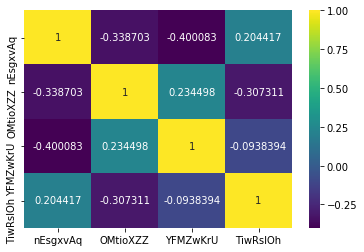

In [34]:
from seaborn import heatmap
heatmap(corr, annot=True, fmt="g", cmap='viridis')
plt.show()